### Imports

In [1]:
import chipwhisperer as cw
import matplotlib.pyplot as plt
import numpy as np
import struct
import time
from decimal import Decimal

### Function Definitions

In [2]:
def float_to_binary_str(f):
    # Pack the float into 4 bytes (32-bit) using IEEE 754 standard
    [packed] = struct.unpack('!I', struct.pack('!f', f))
    # Convert the packed number to a binary string
    return f"{packed:032b}"

In [3]:
def HW_float32(f):
    # Get the binary representation of the 32-bit float
    binary_str = float_to_binary_str(f)
    # Count and return the number of '1' bits
    return binary_str.count('1')

In [ ]:
def get_weights_arr():
    weights_arr = []
    w_val = Decimal('-2.0')
    step = Decimal('0.01')
    for i in range (401):
        weights_arr.append(float(w_val))
        w_val += step
    return weights_arr

In [4]:
print(float_to_binary_str(0.657))
print(HW_float32(0.657))

00111111001010000011000100100111
15


In [7]:
def CPA_attack(trace_waves, inputs, weights, time_sample_index):
    r_abs = []
    n_trace_waves = len(trace_waves)
    leakage_sum = 0
    for trace_wave in trace_waves:
        leakage_sum += trace_wave[time_sample_index]    
    average_leakage = leakage_sum / n_trace_waves
    M = len(inputs)
    N = len(weights)
    
    
    for i in range(N):
        hypothetical_products = []
        hypothetical_leakages = []
        hypothetical_leakage_sum = 0
        for j in range(M):
            hypothetical_product = weights[i] * inputs[j]
            hypothetical_products.append(hypothetical_product)
            #print(type(hypothetical_product))
            #print(type(weights[i]))
            #print(type(inputs[j]))
            #print(inputs[j])
            hypothetical_leakage = HW_float32(hypothetical_product)
            hypothetical_leakages.append(hypothetical_leakage)
            hypothetical_leakage_sum += hypothetical_leakage
            #print(f'Input {inputs[j]} with idx {j}, weight {weights[i]} with idx {i} -> hypothetical_product = {hypothetical_product}')
            #print(hypothetical_leakage)
        average_hypothetical_leakage = hypothetical_leakage_sum / M
        #print(average_hypothetical_leakage)
        
        
        numerator= 0
        denominator1 = 0
        denominator2 = 0
        for j in range(M):
            numerator += (hypothetical_leakages[j] - average_hypothetical_leakage) * (trace_waves[j][time_sample_index] - average_leakage)
            denominator1 += (hypothetical_leakages[j] - average_hypothetical_leakage)**2
            denominator2 += (trace_waves[j][time_sample_index] - average_leakage)**2
            #print(f'Input {inputs[j]} with idx {j}, weight {weights[i]} with idx {i} -> hypothetical_product = {hypothetical_products[j]}' +
            #     f' hypothetical_leakage = {hypothetical_leakages[j]}')
        #print(numerator, denominator1, denominator2)
        denominator1 = denominator1**(1/2)
        denominator2 = denominator2**(1/2)
        #print(numerator, denominator1, denominator2)
        
        corr_coef = numerator / (denominator1 * denominator2)
        r_abs.append(abs(corr_coef))
        #print(abs(corr_coef))
    return r_abs
        
            
            
            

### Project Setup

In [5]:
proj = cw.open_project('project-05')

In [6]:
trace_waves_arr = []
inputs_arr = []
for trace in proj.traces:
    trace_waves_arr.append(trace.wave)
    inputs_arr.append(trace.textin)
print(len(trace_waves_arr))
print(len(inputs_arr))

1000
1000


#### Test inputs 

In [8]:

test_inputs = [0.5, 0.657, 0.3333, 0.0003, 0.189, 0.5243, 0.2222, 0.4959]
test_trace_waves = trace_waves_arr[:8]
test_weights = [0.21, 0.22, 0.23]
test_time_sample_index = 5

In [9]:
CPA_attack(trace_waves = test_trace_waves,
           inputs = test_inputs,
           weights = test_weights,
           time_sample_index = test_time_sample_index)

[0.14877685811090857, 0.43554583372156463, 0.6614872369914845]

#### Generating a weight array - allways the same

In [10]:
weights_arr = []
w_val = Decimal('-2.0')
step = Decimal('0.01')
for i in range (401):
    weights_arr.append(float(w_val))
    w_val += step
print(weights_arr)


[-2.0, -1.99, -1.98, -1.97, -1.96, -1.95, -1.94, -1.93, -1.92, -1.91, -1.9, -1.89, -1.88, -1.87, -1.86, -1.85, -1.84, -1.83, -1.82, -1.81, -1.8, -1.79, -1.78, -1.77, -1.76, -1.75, -1.74, -1.73, -1.72, -1.71, -1.7, -1.69, -1.68, -1.67, -1.66, -1.65, -1.64, -1.63, -1.62, -1.61, -1.6, -1.59, -1.58, -1.57, -1.56, -1.55, -1.54, -1.53, -1.52, -1.51, -1.5, -1.49, -1.48, -1.47, -1.46, -1.45, -1.44, -1.43, -1.42, -1.41, -1.4, -1.39, -1.38, -1.37, -1.36, -1.35, -1.34, -1.33, -1.32, -1.31, -1.3, -1.29, -1.28, -1.27, -1.26, -1.25, -1.24, -1.23, -1.22, -1.21, -1.2, -1.19, -1.18, -1.17, -1.16, -1.15, -1.14, -1.13, -1.12, -1.11, -1.1, -1.09, -1.08, -1.07, -1.06, -1.05, -1.04, -1.03, -1.02, -1.01, -1.0, -0.99, -0.98, -0.97, -0.96, -0.95, -0.94, -0.93, -0.92, -0.91, -0.9, -0.89, -0.88, -0.87, -0.86, -0.85, -0.84, -0.83, -0.82, -0.81, -0.8, -0.79, -0.78, -0.77, -0.76, -0.75, -0.74, -0.73, -0.72, -0.71, -0.7, -0.69, -0.68, -0.67, -0.66, -0.65, -0.64, -0.63, -0.62, -0.61, -0.6, -0.59, -0.58, -0.57, -0.56,

In [11]:
CPA_attack(trace_waves = trace_waves_arr,
           inputs = inputs_arr,
           weights = weights_arr,
           time_sample_index = 1)

[0.14111247122173529,
 0.06117654875295714,
 0.023869930066132434,
 0.1002824669267444,
 0.0947804484618404,
 0.07619078465237283,
 0.058685099094512784,
 0.061943701206644115,
 0.06962691289391389,
 0.06866836468830703,
 0.07120150824728218,
 0.025207910371387813,
 0.05689479406283318,
 0.06040095129757961,
 0.029718686020122776,
 0.05300184599213351,
 0.048861577135013615,
 0.00580450991009611,
 0.053851140241029376,
 0.04093889356378006,
 0.061864131107745655,
 0.02207477078096576,
 0.05158332121966265,
 0.04025018841408184,
 0.08631735742393014,
 0.07085510480142804,
 0.042891742971159066,
 0.02157950532450966,
 0.040259134121017504,
 0.04699475563637328,
 0.05593537614272949,
 0.02685870672172096,
 0.052815562281859414,
 0.009530306607956267,
 0.03574642071071492,
 0.002164987776907007,
 0.0223082080532669,
 0.08492853794993027,
 0.03651095697130105,
 0.05292258724686927,
 0.05420090961758874,
 0.10167133527143624,
 0.06989109081954215,
 0.054871351931254884,
 0.07309121290964936,

In [14]:
start = time.time()
r_abs_all_time_samples = []
start_time_sample = 400
n_time_samples = 4400
for i in range(start_time_sample, n_time_samples):
    r_abs_all_time_samples.append(CPA_attack(trace_waves = trace_waves_arr,
           inputs = inputs_arr,
           weights = weights_arr,
           time_sample_index = i))
    if ((start_time_sample + i) % 100 == 0):
        print(f"{(i - start_time_sample) + 1} timesamlpes done! {time.time() - start} seconds elapsed!")
        
end = time.time()
print(f'Time elapsed: {end - start}')
print(len(r_abs_all_time_samples))

92 timesamlpes done! 111.85106587409973 seconds elapsed!
191 timesamlpes done! 228.05807662010193 seconds elapsed!
290 timesamlpes done! 350.51765727996826 seconds elapsed!
389 timesamlpes done! 494.8271813392639 seconds elapsed!
488 timesamlpes done! 635.2557699680328 seconds elapsed!
587 timesamlpes done! 768.7590277194977 seconds elapsed!
686 timesamlpes done! 902.1751446723938 seconds elapsed!
785 timesamlpes done! 1023.93510389328 seconds elapsed!
884 timesamlpes done! 1141.5041584968567 seconds elapsed!
983 timesamlpes done! 1264.0956547260284 seconds elapsed!
1082 timesamlpes done! 1422.1650114059448 seconds elapsed!
1181 timesamlpes done! 1592.114784002304 seconds elapsed!
1280 timesamlpes done! 1712.3606836795807 seconds elapsed!
1379 timesamlpes done! 1829.4279971122742 seconds elapsed!
1478 timesamlpes done! 1965.1613113880157 seconds elapsed!
1577 timesamlpes done! 2078.2910344600677 seconds elapsed!
1676 timesamlpes done! 2234.182771921158 seconds elapsed!
1775 timesamlpes

In [21]:
corr_graphs = []

for i in range(len(weights_arr)):
    corr_graph = []
    for u in range(4000):
        corr_graph.append(r_abs_all_time_samples[u][i])
    corr_graphs.append(corr_graph)

In [25]:
max_corr = 0
max_corr_index = 0
for i in range(len(corr_graphs)):
    if (max(corr_graphs[i]) > max_corr and i!=200):
        max_corr = max(corr_graphs[i])
        max_corr_index = i

print(max_corr_index)
print(max_corr)

212
0.8396905035125037


In [26]:
print(weights_arr[max_corr_index])

0.12


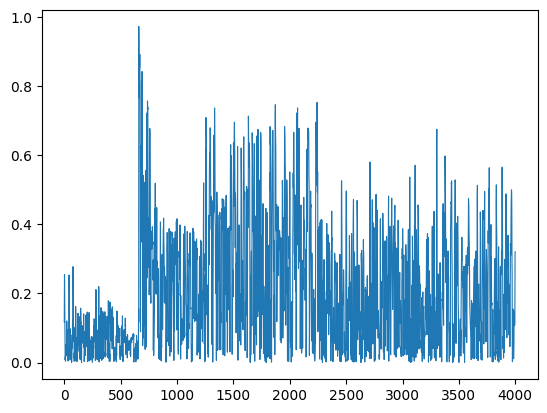

In [32]:
plt.plot(corr_graphs[200], linewidth=0.8)
plt.savefig('max_corr_graph_w200.svg', format='svg')
plt.show()


In [28]:
np_corr_graphs = np.array(corr_graphs)
np_r_abs_all_time_samples = np.array(r_abs_all_time_samples)

In [29]:
np.save('np_corr_graphs_1000i_401w_4000ts.npy', np_corr_graphs)
np.save('np_r_abs_all_time_samples_1000i_401w_4000ts.npy', np_r_abs_all_time_samples)